# Baseline Model: Linear Regression

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading in the data
df = pd.read_excel('data/eth_api_data.xlsx').dropna()
df.set_index('t', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2226 entries, 2015-08-08 to 2021-09-14
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count               2226 non-null   int64  
 1   sending_count       2226 non-null   int64  
 2   receiving_count     2226 non-null   int64  
 3   active_count        2226 non-null   int64  
 4   new_non_zero_count  2226 non-null   int64  
 5   block_height        2226 non-null   int64  
 6   sopr                2226 non-null   float64
 7   price_usd_close     2226 non-null   float64
 8   marketcap_usd       2226 non-null   float64
 9   difficulty_latest   2226 non-null   int64  
 10  hash_rate_mean      2226 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 208.7 KB


# Model Building

In [3]:
# Dropping the target column 'price_usd_close' to separate the independent features
X = df.drop('price_usd_close', axis = 1)

# Setting the dependent variable as 'price_usd_close'
y = df.price_usd_close

# Splitting up the independent and dependent variables into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [4]:
# Instantiating a Linear Regression Model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [5]:
print(model.coef_)

[-1.40909612e-06  1.82529086e-04  2.19618701e-04  2.43713612e-05
  3.91442627e-05  2.61814166e-06 -7.07408917e-11  8.44522981e-09
  9.75898507e-15 -2.19914724e-14]


In [6]:
print(model.intercept_)

-3.98010091178071


In [7]:
# Making predictions using the test set
predict = model.predict(X_test)
predict

array([-2.18117846e+00,  1.40485486e+01,  1.80554436e+03,  1.16948386e+01,
        3.23032057e+02,  5.86294048e+02,  1.42866808e+02,  5.31606912e+02,
        1.71230739e+01,  1.30418453e+02,  1.48951326e+00,  6.41150823e+02,
       -1.23708793e+00,  2.56881212e+02,  2.76865089e+03,  2.26876863e+03,
        1.19281692e+02,  1.37788318e+03,  1.70216054e+01,  1.79682450e+02,
        1.81018942e+01,  1.59577602e+01,  5.00980897e+02,  2.02423865e+02,
        3.11102610e+01,  1.40046480e+02,  4.96817022e+02,  1.64590562e+02,
       -2.12205068e+00,  8.08385194e+02,  4.19763953e+02,  1.49877732e+03,
        1.99902350e+03,  7.18554606e+01,  1.11718215e+02,  1.36182401e+01,
        3.01743579e+02,  5.59479513e+02,  6.55867787e-01,  2.63527741e+02,
        3.10567628e+02,  1.52992962e+01,  1.49296340e+01,  3.13496469e+03,
        1.76805095e+01,  1.79670436e+01,  1.69036087e+02,  2.09306760e+02,
        1.92987335e+02,  2.06670754e+02,  1.69975384e+01,  4.72265057e+01,
        1.55805206e+01,  

In [8]:
# Creating a DataFrame for the actual and predicted price
actuals_and_preds = pd.DataFrame({'Actual':y_test, 'Predicted':predict})

In [9]:
actuals_and_preds.head(10)

,Actual,Predicted
t,,
2015-10-03,0.686043,-2.181178
2016-12-14,8.460000,14.048549
2021-02-17,1842.216243,1805.544362
2016-03-13,14.469333,11.694839
2017-08-21,320.056000,323.032057
2017-12-12,672.446000,586.294048
2018-12-28,136.471481,142.866808
2018-06-11,532.113000,531.606912
2017-02-01,10.730000,17.123074


### Assessing Model Performance

In [10]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, predict))
print('Mean Squared Error', metrics.mean_squared_error(y_test, predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, predict))) # Actual metric that is used

Mean Absolute Error 18.608531128989235
Mean Squared Error 1500.7578921002814
Root Mean Squared Error 38.73961657141538


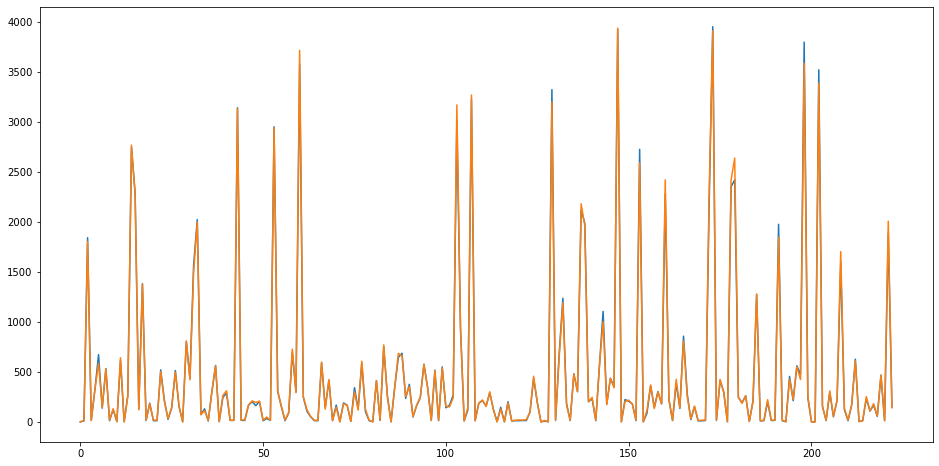

In [11]:
plt.figure(1, figsize=(16,8))
plt.plot(actuals_and_preds.values);